# How Covid-19 Impact the Housing Prices in U.S 

# Data

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Source of Data**

All our variables are monthly data from January 2010 to January 2022

**House price**:  S&P/Case-Shiller U.S. National Home Price Index, source:FRED https://fred.stlouisfed.org/ \
**Covid-19**, as treatment. If before the outbreak of Covid-19 in the US, variable Covid-19 = 0. After the outbreak of Covid-19, Covid-19 =1.\
**Personal income**: Real Disposable Personal Income, source: FRED\
**Population**, source: FRED \
**Interest rate**: Federal Funds Effective Rate, source: FRED \
**Saving rate**: Personal Saving Rate\
**GDP**: Monthly GDP, source: IHS Markit https://ihsmarkit.com/index.html \
**CPI**: consumer price index,  source: FRED\
**Unemployment rate**, source: FRED 

In [2]:
#import data
House_price = pd.read_csv('Home price index.csv') #dependent variable
Population = pd.read_csv('Population.csv')
GDP = pd.read_csv('Monthly GDP.csv')
CPI = pd.read_csv('Consumer Price Index.csv')
Interest = pd.read_csv('Federal fund effective rate.csv')
Income = pd.read_csv('Personal Income.csv')
Unemployment = pd.read_csv('Unemployment rate.csv')
Saving = pd.read_csv('Saving.csv')
print(Saving)

           DATE  PSAVERT
0    2010-01-01      5.9
1    2010-02-01      5.6
2    2010-03-01      5.6
3    2010-04-01      6.2
4    2010-05-01      6.7
..          ...      ...
140  2021-09-01      8.1
141  2021-10-01      7.3
142  2021-11-01      7.3
143  2021-12-01      8.4
144  2022-01-01      6.7

[145 rows x 2 columns]


**Process of Data**

We use Python to rename variables, drop missing data, merge datasets and generate a new variable—Covid-19. Finally all data are integrated into a file named Data.



In [3]:
# merge data
data_frames = [House_price, Population, GDP, CPI, Interest, Income, Unemployment, Saving]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'], how='outer'), data_frames)
print(df_merged)

           DATE  CSUSHPISA    POPTHM  Real Monthly GDP  USACPIALLMINMEI  \
0    2010-01-01    147.395  308706.0         15399.668        91.422556   
1    2010-02-01    145.631  308904.0         15435.796        91.445339   
2    2010-03-01    145.859  309095.0         15532.733        91.820840   
3    2010-04-01    146.399  309289.0         15593.137        91.980322   
4    2010-05-01    146.389  309485.0         15574.485        92.051625   
..          ...        ...       ...               ...              ...   
143  2021-12-01    279.954  332640.0         19785.732       117.629537   
144  2022-01-01    284.330  332684.0         19784.287       118.619339   
145  2022-02-01        NaN  332750.0               NaN       119.702806   
146  2022-03-01        NaN       NaN               NaN              NaN   
147  2022-04-01        NaN       NaN               NaN              NaN   

          DFF  DSPIC96  UNRATE  PSAVERT  
0    0.110000  11644.6     9.8      5.9  
1    0.126429  

In [4]:
#drop missing row
table = df_merged.drop([145, 146, 147])
print(table)

           DATE  CSUSHPISA    POPTHM  Real Monthly GDP  USACPIALLMINMEI  \
0    2010-01-01    147.395  308706.0         15399.668        91.422556   
1    2010-02-01    145.631  308904.0         15435.796        91.445339   
2    2010-03-01    145.859  309095.0         15532.733        91.820840   
3    2010-04-01    146.399  309289.0         15593.137        91.980322   
4    2010-05-01    146.389  309485.0         15574.485        92.051625   
..          ...        ...       ...               ...              ...   
140  2021-09-01    270.362  332403.0         19576.597       115.734314   
141  2021-10-01    273.254  332513.0         19887.311       116.695849   
142  2021-11-01    276.478  332598.0         19778.149       117.269225   
143  2021-12-01    279.954  332640.0         19785.732       117.629537   
144  2022-01-01    284.330  332684.0         19784.287       118.619339   

          DFF  DSPIC96  UNRATE  PSAVERT  
0    0.110000  11644.6     9.8      5.9  
1    0.126429  

In [5]:
list(table)

['DATE',
 'CSUSHPISA',
 'POPTHM',
 'Real Monthly GDP',
 'USACPIALLMINMEI',
 'DFF',
 'DSPIC96',
 'UNRATE',
 'PSAVERT']

In [6]:
#rename variables
table.rename(columns = {'CSUSHPISA':'House_price', 'POPTHM':'Population', 'Real Monthly GDP':'GDP', 'USACPIALLMINMEI':'CPI', 'DFF':'Interest', 'DSPIC96':'Income', 'UNRATE':'Unemployment', 'PSAVERT':'Saving'}, inplace = True)
list(table)

['DATE',
 'House_price',
 'Population',
 'GDP',
 'CPI',
 'Interest',
 'Income',
 'Unemployment',
 'Saving']

In [7]:
print(table)

           DATE  House_price  Population        GDP         CPI  Interest  \
0    2010-01-01      147.395    308706.0  15399.668   91.422556  0.110000   
1    2010-02-01      145.631    308904.0  15435.796   91.445339  0.126429   
2    2010-03-01      145.859    309095.0  15532.733   91.820840  0.164516   
3    2010-04-01      146.399    309289.0  15593.137   91.980322  0.198333   
4    2010-05-01      146.389    309485.0  15574.485   92.051625  0.200645   
..          ...          ...         ...        ...         ...       ...   
140  2021-09-01      270.362    332403.0  19576.597  115.734314  0.079333   
141  2021-10-01      273.254    332513.0  19887.311  116.695849  0.079032   
142  2021-11-01      276.478    332598.0  19778.149  117.269225  0.079667   
143  2021-12-01      279.954    332640.0  19785.732  117.629537  0.079677   
144  2022-01-01      284.330    332684.0  19784.287  118.619339  0.079355   

      Income  Unemployment  Saving  
0    11644.6           9.8     5.9  
1

CDC confirms the first U.S. laboratory-confirmed case of COVID-19 in the U.S. from samples taken on January 18,2020 in Washington state. Therefore, we plan to generate a new variable Covid_19 as a treatment. Between Jan 2010 and Jan 2020, Covid_19 = 0. Between Feb 2020 and Jan 2022, Covid_19 = 1.

In [8]:
#generate new variable Covid_19
# table.assign(covid_19 = 1)
table.head()

,DATE,House_price,Population,GDP,CPI,Interest,Income,Unemployment,Saving
0,2010-01-01,147.395,308706.0,15399.668,91.422556,0.110000,11644.6,9.8,5.9
1,2010-02-01,145.631,308904.0,15435.796,91.445339,0.126429,11655.6,9.8,5.6
2,2010-03-01,145.859,309095.0,15532.733,91.820840,0.164516,11702.1,9.9,5.6
3,2010-04-01,146.399,309289.0,15593.137,91.980322,0.198333,11799.8,9.9,6.2
4,2010-05-01,146.389,309485.0,15574.485,92.051625,0.200645,11887.9,9.6,6.7


In [9]:
#generate a list, then converting to Dataframe
no_covid = 121
num = 145
b = [0 if i < no_covid else 1 for i in range(num)]
df = pd.DataFrame (b, columns = ['Covid'])
df

,Covid
0,0
1,0
2,0
3,0
4,0
...,...
140,1
141,1
142,1
143,1


In [10]:
Data = pd.concat([table, df], axis=1)
Data['DATE'] = pd.to_datetime(Data['DATE'])
print(Data)

          DATE  House_price  Population        GDP         CPI  Interest  \
0   2010-01-01      147.395    308706.0  15399.668   91.422556  0.110000   
1   2010-02-01      145.631    308904.0  15435.796   91.445339  0.126429   
2   2010-03-01      145.859    309095.0  15532.733   91.820840  0.164516   
3   2010-04-01      146.399    309289.0  15593.137   91.980322  0.198333   
4   2010-05-01      146.389    309485.0  15574.485   92.051625  0.200645   
..         ...          ...         ...        ...         ...       ...   
140 2021-09-01      270.362    332403.0  19576.597  115.734314  0.079333   
141 2021-10-01      273.254    332513.0  19887.311  116.695849  0.079032   
142 2021-11-01      276.478    332598.0  19778.149  117.269225  0.079667   
143 2021-12-01      279.954    332640.0  19785.732  117.629537  0.079677   
144 2022-01-01      284.330    332684.0  19784.287  118.619339  0.079355   

      Income  Unemployment  Saving  Covid  
0    11644.6           9.8     5.9      0  

In [11]:
#store data set
Data.to_csv("Data.csv")

**Analysis of Data**

We conduct descriptive analysis, correlation analysis and VIF tests to find sampling restrictions. The plots also show the trends and distributions of variables during the 12 years.

**Descriptive Analysis**

In [12]:
#Discriptive analysis
Data.iloc[:,1:].describe(include='all')

,House_price,Population,GDP,CPI,Interest,Income,Unemployment,Saving,Covid
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,182.612200,322605.110345,17506.315469,102.110519,0.545659,13627.641379,6.288966,8.333793,0.165517
std,36.729805,7546.183077,1244.059812,6.375068,0.728414,1379.796356,2.224145,3.822398,0.372935
min,136.528000,308706.000000,15399.668000,91.422556,0.049000,11644.600000,3.500000,5.600000,0.000000
25%,147.395000,316038.000000,16389.708000,97.633081,0.090333,12396.500000,4.400000,6.700000,0.000000
50%,177.298000,323509.000000,17486.219000,100.559454,0.144333,13515.100000,5.800000,7.300000,0.000000
75%,206.224000,329766.000000,18632.428000,106.648890,0.656786,14678.000000,8.100000,7.800000,0.000000
max,284.330000,332684.000000,19887.311000,118.619339,2.423667,19119.500000,14.700000,33.800000,1.000000


As is illustrated in the descriptive analysis table above, in all our observations, the mean of dummy variable Covid is 0.165517 and it represents tah 16.55% months are in the Treatment of Covid-19. For the the housing price index, it ranges from 136.53 to 284.33 and the mean is 182.61. The average saving rate is 8.33 and the huge differences between max value and 75% quantile implies potential extreme values. Similarly, interest rate has similar situations. 

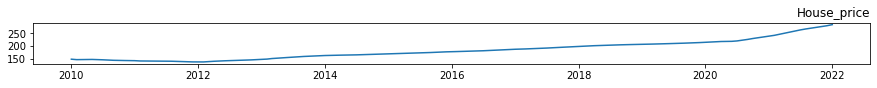

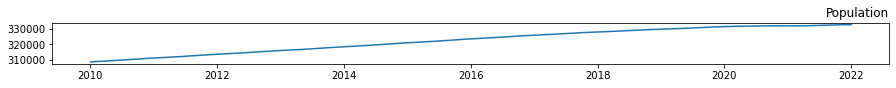

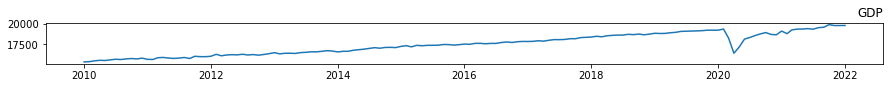

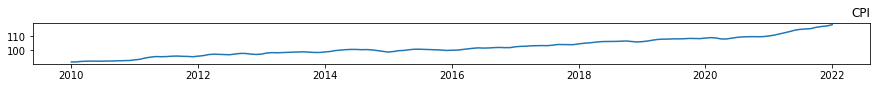

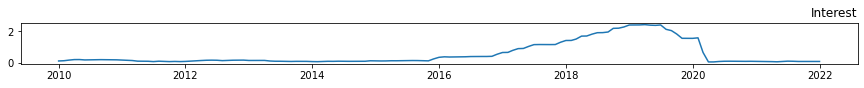

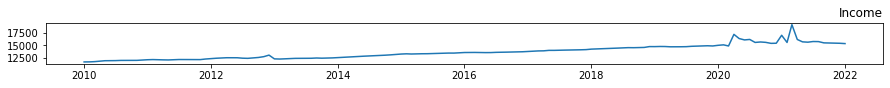

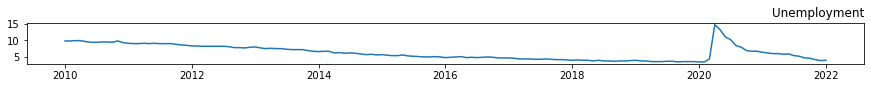

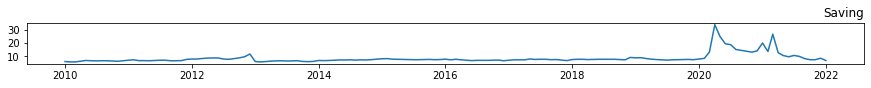

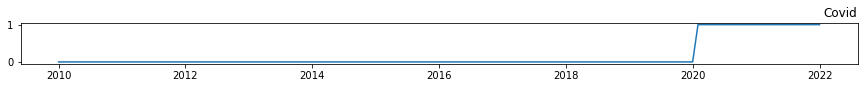

In [13]:
# Draw the trend of variables
values = Data.values
groups = [1, 2, 3, 4, 5, 6, 7,8,9]
i = 1
# plot each column
for group in groups:
    fig = plt.figure(figsize =(15, 8))
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, 0],values[:, group])
    plt.title(Data.columns[group], y=1, loc='right')
    i += 1


plt.show()

As is shown in the plots above, **CPI**, which represents the inflation and price levels in the economy keeps increasing during the 12 years.

For the **interest rate**, it stayed in relative steady low level. Starting from 2016, the interest kept growing in flactuations and reach the peak in 2019. Then the interest rate experienced two sharp decreases and the latter one serves as an intervention in response to Covid-19 recession.

The **housing price** kept an increment during the observed years. The increase rate went up after the mid of 2020.

For the **disposable income**, it experienced several sharp up and downs after the pandemic outbreak.

The **population** increases in a steady speed during the 12 years.

It is clearly shown that the **unemployment rate** experienced a 10-year drop before 2020. During the Covid-19 recession, the unemployment rate sharply increased to the peak and gradually went down to the normal level.

Most of the time, **the real GDP** kept an increasing trend, except a dramatic slump in 2020 after the outbreak of Covid-19.

The **savings rate** also stayed in a relatively stable level before the pandemic, sharp fluctuations could be viewed after that.

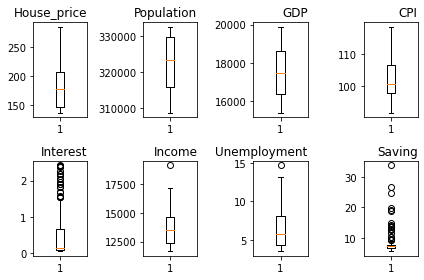

In [14]:
# Draw the distribution of variables' obeservations
groups = [1,2,3,4,5,6,7,8]
i = 1
for group in groups:

    plt.subplot(2,4,i)
    plt.boxplot(Data.iloc[:,group])
    plt.title(Data.columns[group], x=1, loc='right')
    i += 1

plt.tight_layout()

As is shown in the boxplots above, variables CPI,House_price, Income, Population, Unemplyment rate and GDP are relatively skewed but they do not have few extreme values. However, for interest rate and savings rate, they have several extreme values in the quatile of 99%, which we think is caused by Covid-19 pandemic.

**Calculation of Correlation Coefficients**

In [15]:
#calculate correlation coefficients
Data.corr()

,House_price,Population,GDP,CPI,Interest,Income,Unemployment,Saving,Covid
House_price,1.000000,0.917407,0.927595,0.973743,0.311733,0.915357,-0.510883,0.422906,0.747252
Population,0.917407,1.000000,0.960609,0.946187,0.492452,0.924886,-0.650114,0.423505,0.558676
GDP,0.927595,0.960609,1.000000,0.946783,0.539856,0.871311,-0.751566,0.242816,0.512015
CPI,0.973743,0.946187,0.946783,1.000000,0.360136,0.917489,-0.554707,0.420749,0.705019
Interest,0.311733,0.492452,0.539856,0.360136,1.000000,0.344047,-0.629991,-0.126265,-0.233058
Income,0.915357,0.924886,0.871311,0.917489,0.344047,1.000000,-0.402141,0.679184,0.724173
Unemployment,-0.510883,-0.650114,-0.751566,-0.554707,-0.629991,-0.402141,1.000000,0.313540,0.091800
Saving,0.422906,0.423505,0.242816,0.420749,-0.126265,0.679184,0.313540,1.000000,0.674658
Covid,0.747252,0.558676,0.512015,0.705019,-0.233058,0.724173,0.091800,0.674658,1.000000


From correlation table, we find that House_price has a strong correlation with Population, GDP, CPI, Income and Covid. But GDP has a high correlation with CPI, Population, Income and Unemployment rate, implying they may have the possibility of multicollinearity.

**VIF Test**

In [16]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('House_price ~ Covid+Population+GDP+CPI+Interest+Income+Unemployment+Saving', data=Data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,35546.761807,Intercept
1,11.667177,Covid
2,36.489061,Population
3,198.253740,GDP
4,31.505144,CPI
5,3.750961,Interest
6,141.189876,Income
7,14.465925,Unemployment
8,44.149595,Saving


In VIF table, the value of GDP, Income, Saving, CPI, Population and Saving are high. They have the issue of muticollinearity. Therefore, we try to drop some variables.

In [17]:
#find design matrix for linear regression model using 'House_price' as response variable 
y, X = dmatrices('House_price ~ Covid+GDP+Saving', data=Data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,290.277775,Intercept
1,2.403852,Covid
2,1.391764,GDP
3,1.884786,Saving


We only keep Covid, GDP and Saving rate as independent variables. Now, values of VIF are small. We no longer have the issue of multicollinearity.

In [18]:
# fit multiple linear regression model
model = ols('House_price ~ Covid + GDP + Saving', data=Data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1158.
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.47e-99
Time:                        21:14:21   Log-Likelihood:                -492.59
No. Observations:                 145   AIC:                             993.2
Df Residuals:                     141   BIC:                             1005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -203.7385     10.373    -19.641      0.000    -224.246    -183.231
Covid         37.1012      2.540     14.607      0.000      32.080      42.123
GDP            0.0218      0.001     37.567      0.000       0.021       0.023
Saving        -0.0985      0.219     -0.449      0.654      -0.532       0.335
==============================================================================
Omnibus:                       31.317   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.050
Skew:                          -0.325   Prob(JB):                     6.82e-56
Kurtosis:                       9.452   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Models

**1.Without Covariates**

$Y_i = a+b*T+e_i$  

$Y_{i}$: House_price

$T$: beore Covid-19 or after Covid-19

In [19]:
#fit simple linear regression model
model = ols('House_price ~ Covid', data=Data).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     180.8
Date:                Sun, 01 May 2022   Prob (F-statistic):           3.70e-27
Time:                        21:14:21   Log-Likelihood:                -668.51
No. Observations:                 145   AIC:                             1341.
Df Residuals:                     143   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.4308      2.227     76.540      0.0

**Residual Plot**

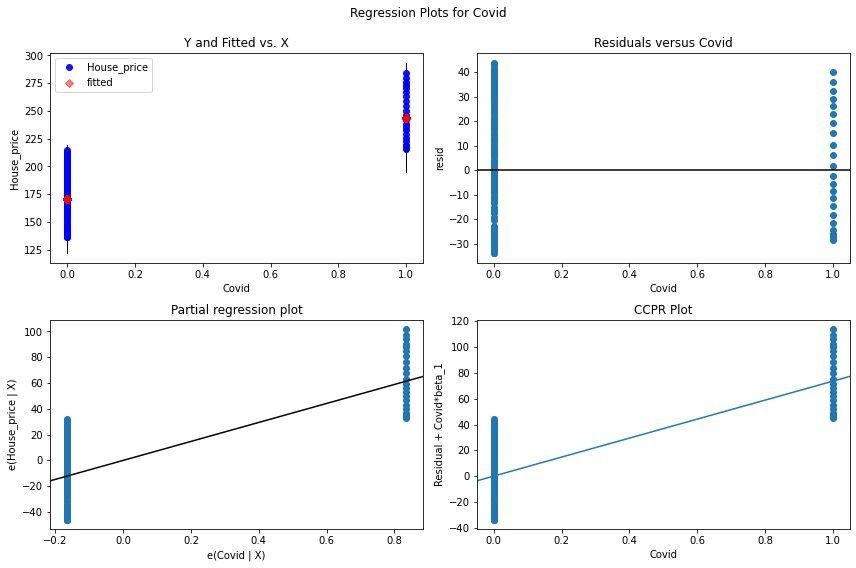

In [20]:
#define figure size
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Covid', fig=fig)

The points are evenly distributed on both sides of the 0 level. There is no heteroscedasticity.

**2. With Covariates**

$Y_i = a+b*T+c*GDP+d*S+e_i$  

$Y_{i}$: House_price

$T$: beore Covid-19 or after Covid-19

$S$: Saving Rate 


In [21]:
# fit multiple linear regression model
model = ols('House_price ~ Covid + GDP + Saving', data=Data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1158.
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.47e-99
Time:                        21:14:22   Log-Likelihood:                -492.59
No. Observations:                 145   AIC:                             993.2
Df Residuals:                     141   BIC:                             1005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -203.7385     10.373    -19.641      0.000    -224.246    -183.231
Covid         37.1012      2.540     14.607      0.000      32.080      42.123
GDP            0.0218      0.001     37.567      0.000       0.021       0.023
Saving        -0.0985      0.219     -0.449      0.654      -0.532       0.335
==============================================================================
Omnibus:                       31.317   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.050
Skew:                          -0.325   Prob(JB):                     6.82e-56
Kurtosis:                       9.452   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With Covariates, adjusted R square increases from 0.555 to 0.96, indicating that the ability to explain variables becomes stronger. The model fits better. Besides, the coefficient estimate of Covid is smaller, suggesting that adding covariates makes the coefficient estimate more accurate.

**Residual Plot**

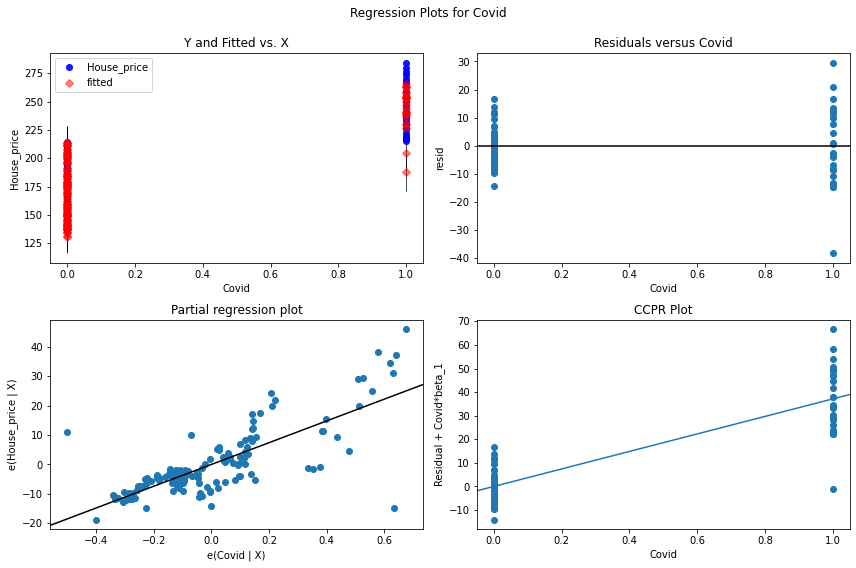

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Covid', fig=fig)

The points are evenly distributed on both sides of the 0 level. There is no heteroscedasticity.

**3. Regressions with lag variables**

$Y_{t+i} = a+b*T+c*GDP_t+d*S_t+e_i$  

$Y_{i}$: House_price

$T$: beore Covid-19 or after Covid-19

$S$: Saving Rate 

$i$: Number of lag periods

To study the potential hysteresis effect of the Covid-19 treatment, we create the variables representing Housing prices in future months and run regressions with these lag variables.

In [23]:
#Create lag variables
Data['House_price_1'] = Data['House_price'].shift(-1) #Housing price of next month 
Data['House_price_2'] = Data['House_price'].shift(-2) #Housing price of next second month 
Data['House_price_3'] = Data['House_price'].shift(-3) #Housing price of next third month 
print(Data)

          DATE  House_price  Population        GDP         CPI  Interest  \
0   2010-01-01      147.395    308706.0  15399.668   91.422556  0.110000   
1   2010-02-01      145.631    308904.0  15435.796   91.445339  0.126429   
2   2010-03-01      145.859    309095.0  15532.733   91.820840  0.164516   
3   2010-04-01      146.399    309289.0  15593.137   91.980322  0.198333   
4   2010-05-01      146.389    309485.0  15574.485   92.051625  0.200645   
..         ...          ...         ...        ...         ...       ...   
140 2021-09-01      270.362    332403.0  19576.597  115.734314  0.079333   
141 2021-10-01      273.254    332513.0  19887.311  116.695849  0.079032   
142 2021-11-01      276.478    332598.0  19778.149  117.269225  0.079667   
143 2021-12-01      279.954    332640.0  19785.732  117.629537  0.079677   
144 2022-01-01      284.330    332684.0  19784.287  118.619339  0.079355   

      Income  Unemployment  Saving  Covid  House_price_1  House_price_2  \
0    11644.6

**3.1 Lag one month**

$Y_{t+1} = a+b*T+c*GDP_t+d*Saving_t+e_i$

In [24]:
# lag regression (One month)
Data1 = Data.drop([144])
y = Data1['House_price_1']
x = Data1[['GDP','Covid','Saving']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          House_price_1   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.11e-100
Time:                        21:14:22   Log-Likelihood:                -483.75
No. Observations:                 144   AIC:                             975.5
Df Residuals:                     140   BIC:                             987.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -208.3888      9.990    -20.859      0.0

In [25]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns

vif

,VIF,variable
0,288.276807,const
1,1.360618,GDP
2,2.459180,Covid
3,1.974263,Saving


**3.2 Lag two months**

$Y_{t+2} = a+b*T+c*GDP_t+d*Saving_t+e_i$  

In [26]:
# lag regression (Two months)
Data2 = Data.drop([143,144])
y = Data2['House_price_2']
x = Data2[['GDP','Covid','Saving']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          House_price_2   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.65e-101
Time:                        21:14:22   Log-Likelihood:                -476.71
No. Observations:                 143   AIC:                             961.4
Df Residuals:                     139   BIC:                             973.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -212.2438      9.738    -21.795      0.0

In [27]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns

vif

,VIF,variable
0,286.334848,const
1,1.330068,GDP
2,2.486844,Covid
3,2.039198,Saving


**3.3 Lag three months**

$Y_{t+3} = a+b*T+c*GDP_t+d*Saving_t+e_i$  

In [28]:
# lag regression (Three months)
Data3 = Data.drop([142,143,144])
y = Data3['House_price_2']
x = Data3[['GDP','Covid','Saving']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          House_price_2   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sun, 01 May 2022   Prob (F-statistic):          8.88e-101
Time:                        21:14:22   Log-Likelihood:                -469.94
No. Observations:                 142   AIC:                             947.9
Df Residuals:                     138   BIC:                             959.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -212.1195      9.507    -22.313      0.0

In [29]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns

vif

,VIF,variable
0,284.338695,const
1,1.298985,GDP
2,2.557670,Covid
3,2.147904,Saving


Our findings are robust to different model specifications. We tried three model specifications, without covariates, with covariates, and with lagged dependent variables. Among them, lagged dependent variables were carried out for one month, two months and three months respectively. All model results show that the variable Covid has a significant positive correlation with house prices, that is, the existence of Covid-19 pandemic makes house prices rise.